# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [ ]:
# Importando as blibliotecas

import seaborn as sns
import plotly.io as pio  # noqa: F401
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Exibe todas as expressões da célula
from sklearn.preprocessing import LabelEncoder  # noqa: E402
from sklearn.model_selection import train_test_split  # noqa: E402
from imblearn.over_sampling import SMOTE  # noqa: E402


In [2]:
# Verificando o caminho e indicando o df

caminho = '.\\CREDIT_SCORE_PROJETO_PARTE1.csv'

if os.path.exists(caminho):
    print("O caminho foi encontrado!")
else:
    print("O caminho não foi encontrado.")

df = pd.read_csv(caminho, delimiter=';')

df.head(10)

O caminho foi encontrado!


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
# Verificando as informações

df.info()

# Fazendo as transformações necessárias

df["Income"] = df['Income'].str.replace(".", "").str.replace(",", "") # Tratando as vírgulas e pontos
df['Income'] = df['Income'].astype(int) # Income para float

# Verificando se os objetos possuem erros

df['Gender'].unique()
df['Education'].unique()
df['Marital Status'].unique()
df['Home Ownership'].unique()
df['Credit Score'].unique()

# Tratando duplicats

df.drop_duplicates()

# Verificando se as alterações foram feitas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


array(['Female', 'Male'], dtype=object)

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

array(['Single', 'Married'], dtype=object)

array(['Rented', 'Owned'], dtype=object)

array(['High', 'Average', 'Low'], dtype=object)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,5000000,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,10000000,Master's Degree,Married,2,Owned,High
2,35.0,Female,7500000,Doctorate,Married,1,Owned,High
3,40.0,Male,12500000,High School Diploma,Single,0,Owned,High
4,45.0,Female,10000000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
148,NaN,Male,5750000,Associate's Degree,Single,0,Rented,Average
149,NaN,Female,7250000,Bachelor's Degree,Married,2,Owned,High
150,NaN,Male,10000000,Master's Degree,Single,0,Owned,High
151,NaN,Female,9000000,Doctorate,Married,1,Owned,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    int64  
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

Eu escolhi substituir pois haviam muitos dados nulos, e o dataframe é pequeno. Fiz a substituição com base na alta correalação, entre income e age, e elas fazem sentido.

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

A porcentagem de valores nulos em Age é:  20.73170731707317 %


np.float64(37.50769230769231)

np.float64(36.0)

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Age'>

Text(0.5, 1.0, 'Boxplot da Coluna Age')

Text(0, 0.5, 'Age')

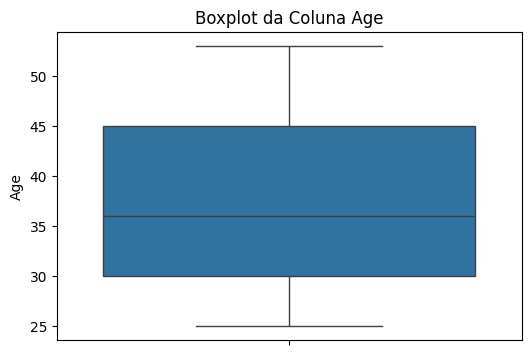

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlação')

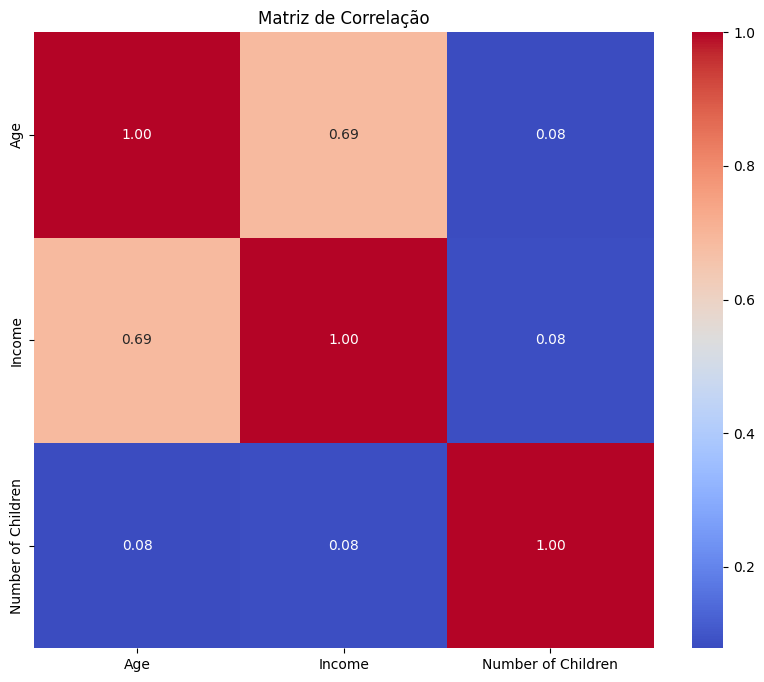

A media de idade abaixo da mediana de income é:  33.13636363636363
A media de idade acima da mediana de income é:  42.015625


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [4]:
# Verificando se tem valores nulos

df.isnull().sum()
Nulos_Age = (df['Age'].isnull().sum() / len(df)) * 100
print("A porcentagem de valores nulos em Age é: ", Nulos_Age,"%")
# Há valores nulos na coluna Age, a quantidade é pequena, mas o número de dados no csv também é pequena, logo vou substituir ao invés de retirar já que retirar tiraria 20% dos dados de ma coluna que já não tem muitos dados.

# Fazendo uma análise para descobrir como vou trata-los

df['Age'].mean()
df['Age'].median()

# Plotando gráfico para descobrir se há outliers

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Age')
plt.title('Boxplot da Coluna Age')
plt.ylabel('Age')
plt.show()

# Verificicando se idade tem alguma correlação com outra variável para saber se posso fazer a substituição dos nulos pela média sem causar problemas

matriz_corr = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# Há uma correlação forte age com income, logo, vou fazer uma substituição me baseando nisso. 

Meio_income = df['Income'].median()

media_age_baixo = df.loc[df['Income'] < Meio_income, "Age"].mean()
media_age_alto = df.loc[df['Income'] >= Meio_income, "Age"].mean()

print('A media de idade abaixo da mediana de income é: ', media_age_baixo) # A média foi 33.13
print('A media de idade acima da mediana de income é: ', media_age_alto) # A média foi 42.015

# Como as médias foram números quebrados e isso não faria sentido, decidir arredondar para facilita a análise dos dados.
media_age_baixo = 33
media_age_alto = 42

Age_na = df["Age"].isna()

df.loc[Age_na & (df["Income"] <  Meio_income), "Age"] = media_age_baixo
df.loc[Age_na & (df["Income"] >= Meio_income), "Age"] = media_age_alto

# Basicamente eu vi qual era a mediana de income, depois vi a média de Age quando a income era ebaixo da mediana e de wuando era acima, depois eu peguei onde era nulo, e para finalizar, onde era nulo, se fosse acima da mediana de income eu trocava pela media de age que era acima, se fosse abaixo, eu trocava pela media de Age que era abaixo.

# Após o tratamento dos nulos em 'Age', para remover as casas decimais e deixar apenas números inteiros, usei:
df['Age'] = df['Age'].round(0).astype(int)

# Verificando se as alterações funcionaram.

df.isnull().sum()


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [5]:
# Verificando se os dados categóricos possuem erros. (Resolvi normaliza-los também!)

df['Gender'] = df['Gender'].str.upper()
df['Gender'].unique()

df['Education'] = df['Education'].str.upper()
df['Education'].unique()

df['Marital Status'] = df['Marital Status'].str.upper()
df['Marital Status'].unique()

df['Home Ownership'] = df['Home Ownership'].str.upper()
df['Home Ownership'].unique()

df['Credit Score'] = df['Credit Score'].str.upper()
df['Credit Score'].unique()

array(['FEMALE', 'MALE'], dtype=object)

array(["BACHELOR'S DEGREE", "MASTER'S DEGREE", 'DOCTORATE',
       'HIGH SCHOOL DIPLOMA', "ASSOCIATE'S DEGREE"], dtype=object)

array(['SINGLE', 'MARRIED'], dtype=object)

array(['RENTED', 'OWNED'], dtype=object)

array(['HIGH', 'AVERAGE', 'LOW'], dtype=object)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [6]:
df.describe()

,Age,Income,Number of Children
count,164.000000,1.640000e+02,164.000000
mean,37.560976,8.376524e+06,0.652439
std,7.835890,3.245731e+06,0.883346
min,25.000000,2.500000e+06,0.000000
25%,31.750000,5.750000e+06,0.000000
50%,36.000000,8.375000e+06,0.000000
75%,43.000000,1.050000e+07,1.000000
max,53.000000,1.625000e+07,3.000000


Resposta: Após a análise não foi apontado nenhum outlier, o number of childen tem um caso que se diferencia dos outros, mas não é nada alarmante, e é extremamente possível ter 3 filhos, não indicando nenhum tipo de erro de digitação ou coisa do tipo. O income a mesma coisa, apesar de ter valores altos e baixos, são todos valores possiveis e que estão dentro dos quandrantes. Conclusão, a principio, não é necessário se preocupar com outliers.

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Income'>

Text(0.5, 1.0, 'Boxplot da Coluna Income')

Text(0, 0.5, 'Age')

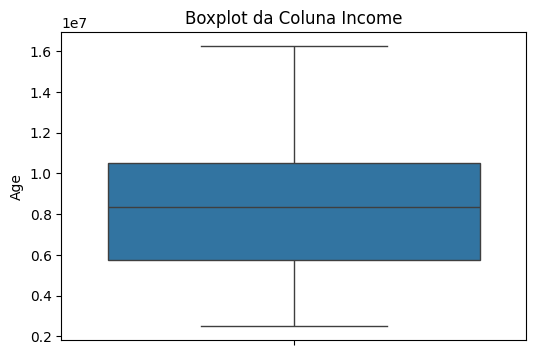

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Number of Children'>

Text(0.5, 1.0, 'Boxplot da Coluna Number of Children')

Text(0, 0.5, 'Age')

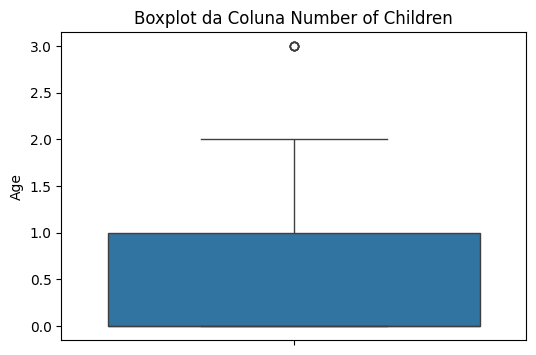

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Income')
plt.title('Boxplot da Coluna Income')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Number of Children')
plt.title('Boxplot da Coluna Number of Children')
plt.ylabel('Age')
plt.show()



**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [8]:
# Primeiro, info para verificar quais são as variáveis categóricas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


# Gender
Reposta: Em relação ao gender, está bem distribuido e balanceado, a quantidade de mulheres é bem próxima da quantidade de homens, o que é muito bom na hora de tirar insights quando fizermos a análise bivariada.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Gender'>

Text(0.5, 1.0, 'Distribuição dos clientes por gênero')

(array([0, 1]), [Text(0, 0, 'FEMALE'), Text(1, 0, 'MALE')])

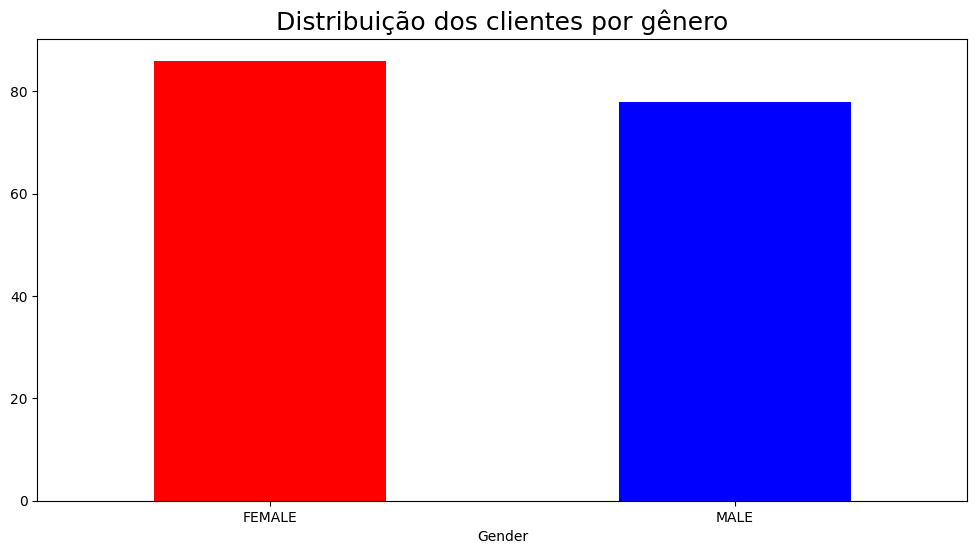

In [9]:
plt.figure(figsize=(12, 6))
df['Gender'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribuição dos clientes por gênero', fontsize=18)
plt.xticks(rotation=0)
plt.show()

# Education
Reposta: O gráfico mostra que a maioria dos clientes tem bacharel, e poucos tem associate's degre, a distribuição não é extremamente desigual mas é desigual, tendo categorias com valores bem superiores a outras. Essas informações serão valiosas quando compararmos com idade, coluna que provavelmente tem um relação direta.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Education'>

Text(0.5, 1.0, 'Distribuição dos clientes por nível de educação')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'HIGH SCHOOL DIPLOMA'),
  Text(1, 0, "ASSOCIATE'S DEGREE"),
  Text(2, 0, "BACHELOR'S DEGREE"),
  Text(3, 0, "MASTER'S DEGREE"),
  Text(4, 0, 'DOCTORATE')])

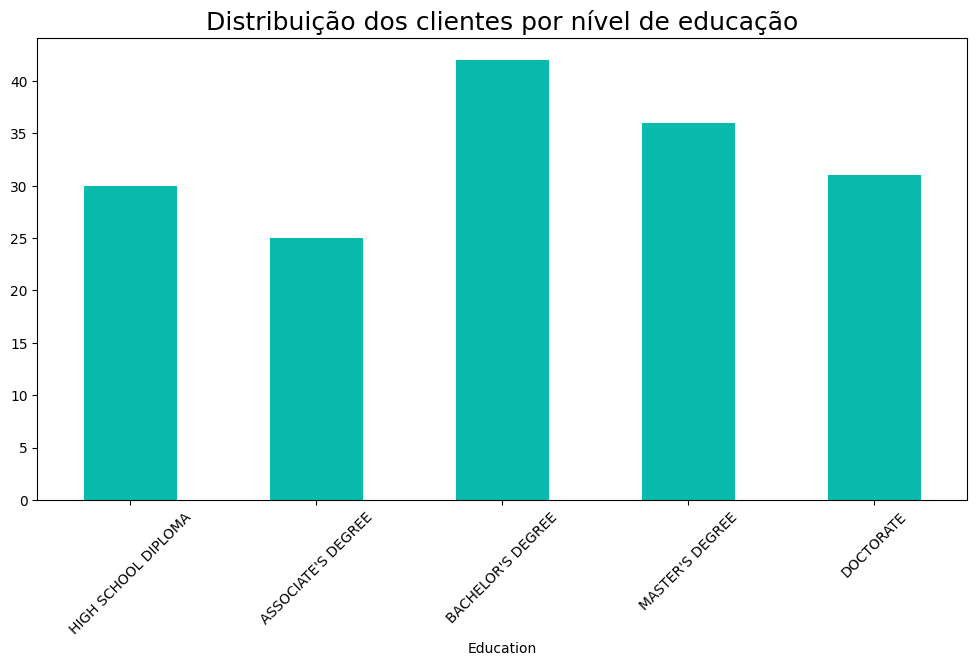

In [10]:
plt.figure(figsize=(12, 6))
education_order = [
    "HIGH SCHOOL DIPLOMA",
    "ASSOCIATE'S DEGREE",
    "BACHELOR'S DEGREE",
    "MASTER'S DEGREE",
    "DOCTORATE"
]
df['Education'].value_counts().reindex(education_order).plot(kind='bar', color="#09BBAC")
plt.title('Distribuição dos clientes por nível de educação', fontsize=18)
plt.xticks(rotation=45)
plt.show()

# Marital Status
Resposta: Após a análise, podemos ver que a maioria dos clientes é casado mas existe uma quantidade muito grande de clientes solteiros também, mostreando que é uma categoria relativamente bem distribuida. Isso é bom, pois na análise bivariada, qualquer difereça grande entre essa categoria e outra, mostra que uma correlação é bem possível.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Marital Status'>

Text(0.5, 1.0, 'Distribuição do estado civíl dos clientes')

(array([0, 1]), [Text(0, 0, 'MARRIED'), Text(1, 0, 'SINGLE')])

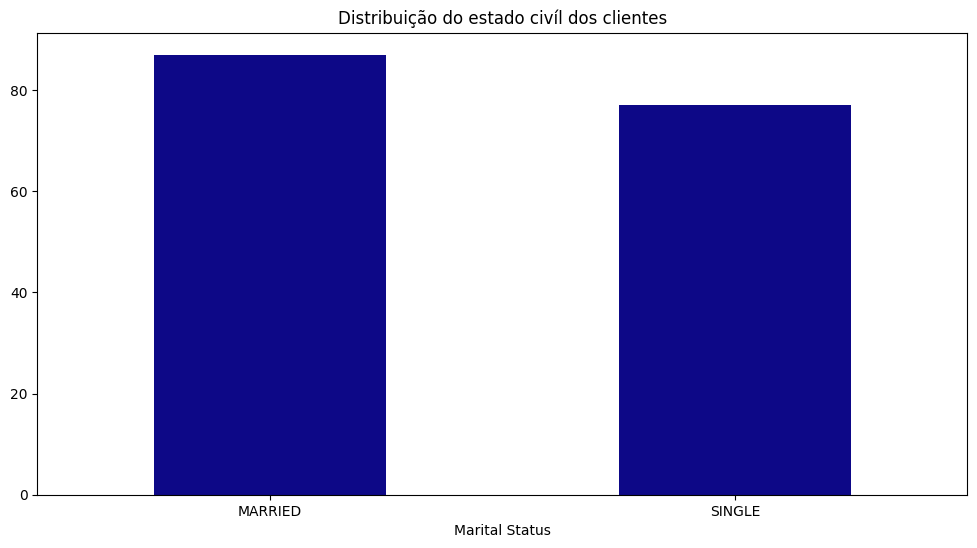

In [11]:
plt.figure(figsize=(12, 6))
df['Marital Status'].value_counts().plot(kind='bar', colormap='plasma')
plt.title("Distribuição do estado civíl dos clientes")
plt.xticks(rotation=0)
plt.show()

# Home Ownership
reposta: A maior parte dos clientes tem casa própria, o que normalmente indica uma situação financeira mais estável. Mesmo assim, tem bastante gente que mora de aluguel. Ter uma casa costuma ajudar no score de crédito, já que mostra responsabilidade e estabilidade. Mas concluindo, o gráfico apresenta uma destribuição bem desigual.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Home Ownership'>

Text(0.5, 1.0, 'Distribuição de clientes por casa própria')

(array([0, 1]), [Text(0, 0, 'OWNED'), Text(1, 0, 'RENTED')])

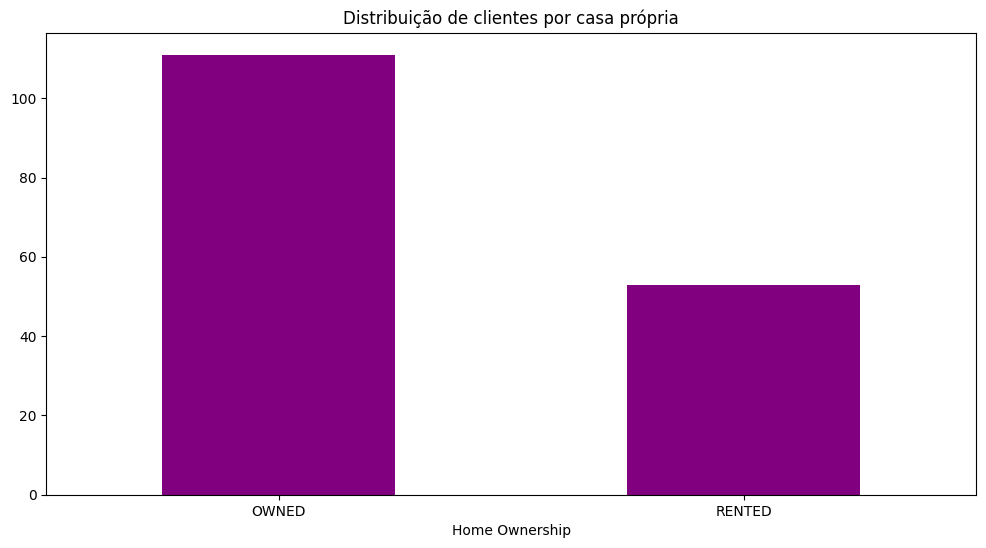

In [12]:
plt.figure(figsize=(12, 6))
df['Home Ownership'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribuição de clientes por casa própria")
plt.xticks(rotation=0)
plt.show()

# Credit Score
Reposta: Essa é a coluna mais importante e merece muita atenção, a principio, a maioria dos clientes possui um credit score alto, o que é muito bom, ja que essa é a categoria dominante dessa coluna, ou seja, ela é uma coluna desbalanceada. Mas também mostra que será necessário tratamento futuro para modelos de machining learnig já que a quantidade de pessoas com score low é tão baixa que pode atrapalhar o aprendizado do modelo.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Credit Score'>

Text(0.5, 1.0, 'Distribuição de clientes por Credit Score')

(array([0, 1, 2]),
 [Text(0, 0, 'LOW'), Text(1, 0, 'AVERAGE'), Text(2, 0, 'HIGH')])

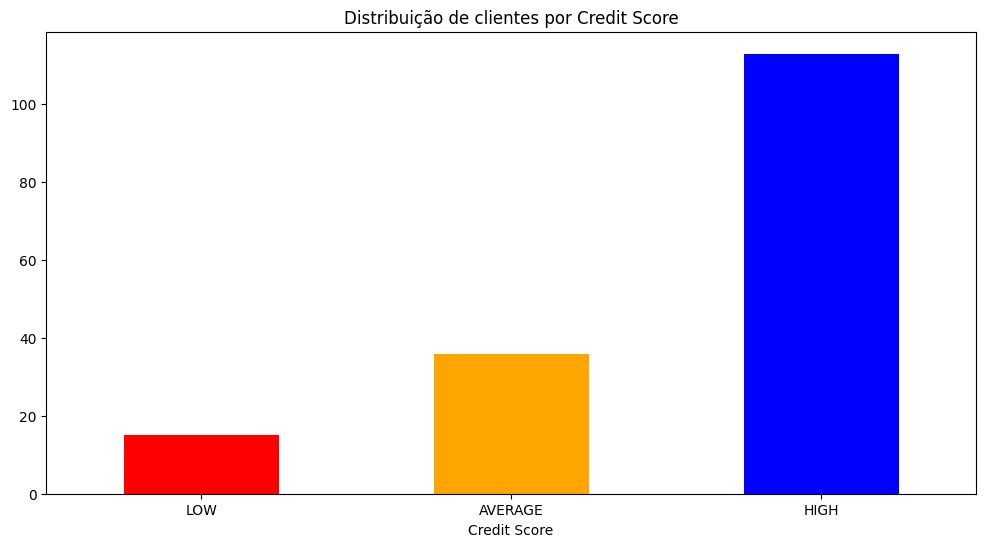

In [13]:
plt.figure(figsize=(12, 6))
score_order = ['LOW', 'AVERAGE', 'HIGH']
colors = ['red', 'orange', 'blue']
df['Credit Score'] = df['Credit Score'].str.upper()
df['Credit Score'].value_counts().reindex(score_order).plot(kind='bar', color=colors)
plt.title("Distribuição de clientes por Credit Score")
plt.xticks(rotation=0)
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Reposta: Não foi encontrado nenhum outlier e todos os dados aparentam ser bem plausíveis.

In [14]:
# N/A

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



# Idade x status civil
Resposta: Após a análise do gráfico, fica mais evidente que pessoas mais velhas (Acima dos 45 anos) tem mais chance de estarem casadas. No caso do nossos clientes, 100% dos nossos clientes acima dos 45 anos se encontram casados. Já antes dos 30, é um pouco mais distribuido, no caso, apesar de ter mais clientes casados, ainda tem muitos clientes solteiros.

In [15]:
# Plotando um gráfico, escolhi fazer um histograma para essa situação.

fig = px.histogram(df, x="Age", color="Marital Status")
fig.show()

# Score de crédito x Nível de escolaridade
Resposta: A princípio, pessoas com um nivel de escolaridade mais alto, possuem scores mais altos também, geralmente isso acontece porque para conseguir um doutorado por exemplo é necessário bastante tempo de estudo, e com a idade, geralmente o individuo conquista estabilidade financeira e responsabilidade responsabilidade, o que explica o Score de crédito alto.

In [16]:
score_colors = {'LOW': 'red', 'AVERAGE': 'orange', 'HIGH': 'blue'}
fig = px.histogram(
    df,
    x='Education',
    color='Credit Score',
    category_orders={'Education': education_order, 'Credit Score': ['LOW', 'AVERAGE', 'HIGH']},
    color_discrete_map=score_colors,
    barmode='group',
    title='Distribuição do Score de Crédito por Nível de Escolaridade'
)
fig.update_layout(
    xaxis_title='Nível de Escolaridade',
    yaxis_title='Quantidade de Clientes',
    legend_title='Score de Crédito',
    bargap=0.15,
    font=dict(size=14)
)

# Salário x Idade
Resposta: De certa forma influencia sim, ainda mais quandos dois extremos são comparados(Mais novos x mais velhos) a tendencia acaba sendo que pessoas mais velhas tem salários maiores. Há algumas inconcitencias, no caso, grupos de ididades que se destacam em income, mesmo sendo mais novos, ou mais velhos que tem uma receita mais baixa, mas no geral, olhando o gráfico como um todo, as pessoas mais velhas tem uma tendência maior a receber mais.

In [17]:
fig = px.box(
    df,
    x='Age',
    y='Income',
    title='Distribuição da Renda por Idade dos Clientes'
)
fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Renda',
    font=dict(size=14),
    plot_bgcolor='rgba(245,245,245,1)'
)

# Salário x Score de crédito
Resposta: O grafico mostra sim que pessoas com salarios maiores possuem um score mais alto, ainda mais quando vemos pela média, já que a média salrial das pessoas com um credit scopre alto é a maior e vai diminuindo de acordo com a categoria, sendo low, a menor média salarial.

In [18]:
fig = px.histogram(
    df,
    x="Credit Score",
    y="Income",
    histfunc="avg",                 
    category_orders={"Credit Score": score_order},
    text_auto=".2s",                   
    labels={"Income":"Salário", "Credit Score":"Score de Crédito"},
    title="Salário típico por faixa de Score"
)
fig.update_traces(
    textposition="outside",
    marker_color="#13D13C"    
)
fig.update_layout(
    yaxis_title=" Média do salário"
)

# Casa própria x Score de crédito
Resposta: Sim! O gráfico mostra que clientes com casa própria possuem sim um score mais alto, no caso, não exite nenhum cliente com score low e que possue casa própria. já no alugado há sim. Não só, mas a maioria dos cliente com score alto possuem casa própria.

In [19]:
fig = px.histogram(
    df,
    x='Home Ownership',
    color='Credit Score',
    category_orders={'Credit Score': ['LOW', 'AVERAGE', 'HIGH']},
    barmode='group',
    title='Distribuição do Score de Crédito por Casa própria'
)
fig.update_layout(
    xaxis_title='Casa própria',
    yaxis_title='Quantidade de Clientes',
    legend_title='Score de Crédito',
    bargap=0.20,
    font=dict(size=14),
    plot_bgcolor='rgba(245,245,245,1)'
)

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

# Perguntas

- Existe alguma relação entre casamento e um Credit Score alto?
- Seria verdader dizer que os clientes com renda alta possuem casa própria?
- Com base nos clientes, existe alguma relação entre Nivel de escolaridade e renda anual?

Perguta extra:
- Dentre os clientes, quem te uma média salarial maior? Homens ou mulheres?

# Marital Status x Credit Score
Reposta: Talvez uma associação, já que de acordo com o gráfico, pessoas casadas tem uma tendencia muito maior a ter um Score alto e pessoas solteiras a ter um Score baixo, possívelmente pois casamento muitas vezes está associados a estabilidade e responsabilidade, possívelmete explicando o motivo do gráfico estar divido dessa forma.

In [20]:
fig = px.histogram(
    df,
    x='Credit Score',
    color='Marital Status',
     category_orders={'Credit Score': ['LOW', 'AVERAGE', 'HIGH']},
    barmode='group',
    title='Distribuição de Credit Score por Status Civil'
)

fig.update_layout(
    xaxis_title='Credit Score',
    yaxis_title='Quantidade de Clientes'
)

# Income x Home Ownership
Reposta: Seria sim, existem uma tendencia de acordo com o gráfico que mostra que clientes com renda mais possuem casa própria, provavelmente porque uma maior quantida de dinheiro direciona para investimentos, no caso, comprar uma casa própria.

In [21]:
fig = px.histogram(
    df,
    x='Home Ownership',
    y="Income",
    histfunc='avg',
    text_auto=".2s",                   
    labels={"Income":"Salário", "Home ownership":"Casa Própria"},
    title="Salário médio por casa própria"
)

fig.update_traces(
    textposition="outside",
    marker_color="#0D0B94"    
)

# Education x Income
Reposta: Não evidentemente, existe categorias que se destacam, por exemplo o Master's Degree, mas o Doctorate ( Teoricamente precisa de mais tempo de estudo) e o High School Diploma (Precisa de menos tempo e para conseguir os outros você precisa ter passado por esse), possuem uma média de renda próxima. Há uma tendencia, visto que, as duas maiores médias de income são também os 2 últimos níveis de escolaridade, mas o gráfico taambém mostra que é possível ter um nível de escolaridade baixo e ter uma boa income.

In [22]:
fig = px.histogram(
    df,
    x='Education',
    y="Income",
    histfunc='avg',
    text_auto=".2s",
    category_orders={'Education': education_order},                   
    labels={"Income":"Salário", "Education":"Nível de escolaridade"},
    title="Salário médio por Nível de escolaridade"
)

fig.update_traces(
    textposition="outside",
    marker_color="#D4830A"    
)

# Gender x Income
Resposta: Com base no gráfico, apesar de serem bem distríbuidos, dentre os clientes, os homens mostram ter um uma renda anual maior que a das mulheres. O que deve ser tratado com cuidado pois o modelo poderia fazer uma correlação, mesmo que uma coisa não explique a outra, ou seja, é uma associação, e não estão relacionadas.

In [23]:
fig = px.histogram(
    df,
    x='Gender',
    y="Income",
    histfunc='avg',
    text_auto=".2s",                   
    labels={"Income":"Salário", "Credit Score":"Score de Crédito"},
    title="Salário típico por faixa de Score"
)

fig.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Média da renda anual'
)

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [24]:
df.info()
df.select_dtypes(include=['number']).corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


,Age,Income,Number of Children
Age,1.000000,0.689081,0.043408
Income,0.689081,1.000000,0.084547
Number of Children,0.043408,0.084547,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Sim, há variáveis com alta correlação, sendo elas Age e Income, coisa que de fato faz sentido visto que a tência é que cquanto mais velho você é, mais dinheiro você ganha... Por diversos motivos, como experiencia adquirida, progressão na carreira, conhecimento, entre outros... Number of children não tem uma alta correlação, mas está fazendo sentido no seu contexto.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

Obs: Eu tentei fazer one hot para credit score(Já que ele possue algumas variaveis), aí tive um monte de problemas, e percebi que não foi uma boa ideia, já que alem de "dar colona pro modelo futuramente", fica muito difícil de balancear , e fazer as alteraçõe necessárias, por isso, ele saiu da regra a frente, e foi para label encoder.

In [25]:
# Utilizarei Label Encoder para os casos que possuem apenas duas variáveis diferentes na mesma coluna e aos que possuem mais, vou utilizar One hot.

# Salvando informações que serão importantes futuramente

Score_count = df['Credit Score'].value_counts().rename_axis("Credit Score").reset_index(name = "Quantidade")

# Primeiro Label Enconder

labelE = LabelEncoder() # Primeiro estou criando uma instância

df['Gender Encoded'] = labelE.fit_transform(df['Gender']) # 0 - female, 1 - male
df['Marital Status Encoded'] = labelE.fit_transform(df['Marital Status']) # 1 - Single, 0 - married
df['Home Ownership Encoded'] = labelE.fit_transform(df['Home Ownership']) # 1 - Rented, 0 - Owned
df['Credit Score Encoded'] = labelE.fit_transform(df['Credit Score']) # 1 - High, 2 - Low, 0 - Average

# Agora One hot

df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

# Agora vou retirar as colunas categóricas

df = df.drop(['Gender'], axis=1)
df = df.drop(['Marital Status'], axis=1)
df = df.drop(['Home Ownership'], axis=1)
df = df.drop(['Credit Score'], axis=1)

# Com o método aprendido em aula vou transformar as colunas int

for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

     Age    Income  Number of Children  Gender Encoded  \
0     25   5000000                   0               0   
1     30  10000000                   2               1   
2     35   7500000                   1               0   
3     40  12500000                   0               1   
4     45  10000000                   3               0   
..   ...       ...                 ...             ...   
159   29   2750000                   0               0   
160   34   4750000                   0               1   
161   39   6250000                   2               0   
162   44   8750000                   0               1   
163   49   7750000                   1               0   

     Marital Status Encoded  Home Ownership Encoded  Credit Score Encoded  \
0                         1                       1                     1   
1                         0                       0                     1   
2                         0                       0                     

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

Resposta: Há sim muitas variáveis novas, com forte correlação, o que é muito útil para entender ainda melhor o df, e apareceu tanto correlação positiva quanto negativas com valores bem altos.

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlação')

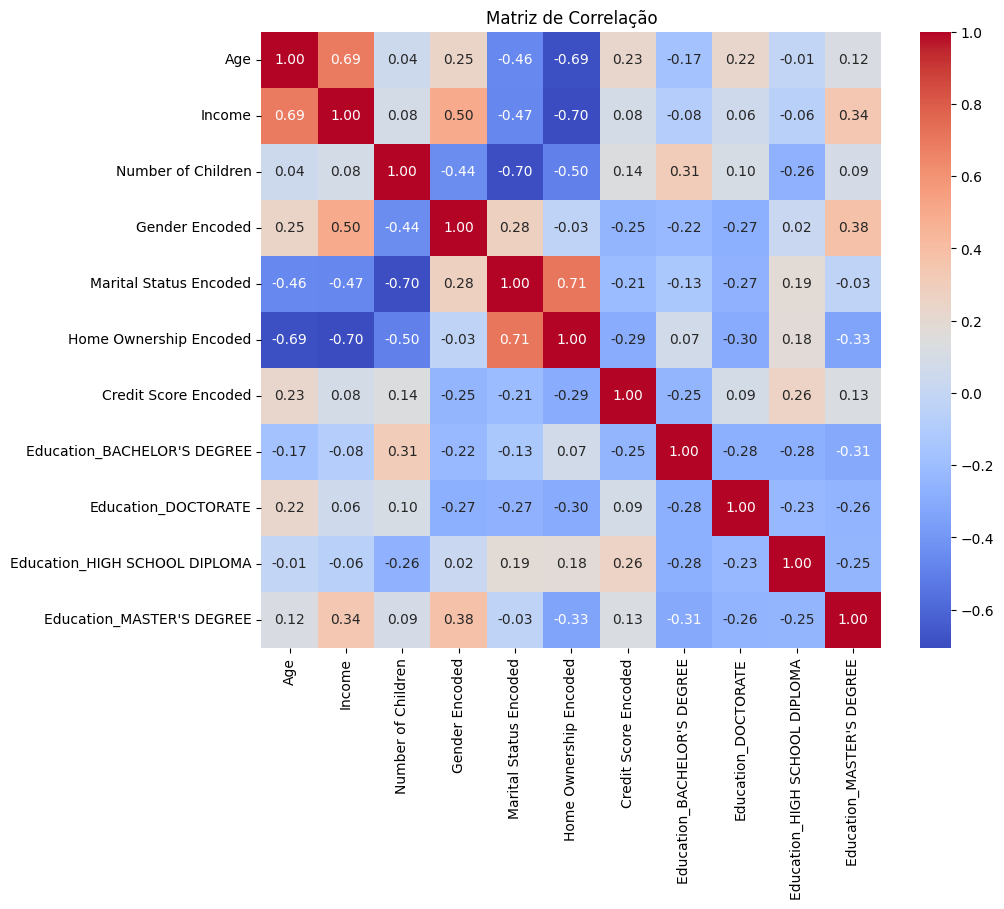

In [26]:
matriz_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [27]:
# Primeiro vou seperar os dados em features.

X = df.drop('Credit Score Encoded', axis=1)  
y = df['Credit Score Encoded']

# Separando em treino e test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

# Verificando com shape

print("O tamanho de X_train: ", X_train.shape)

print("O tamanho de X_test: ", X_test.shape)

print("O tamanho de y_train: ", y_train.shape)

print("O tamanho de y_test: ", y_test.shape)

O tamanho de X_train:  (123, 10)
O tamanho de X_test:  (41, 10)
O tamanho de y_train:  (123,)
O tamanho de y_test:  (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

Resposta: Não está balanceada e isso trará problemas para o modelo.

In [28]:
fig = px.bar(
    Score_count,
    x="Credit Score", y="Quantidade",
    text="Quantidade",
    category_orders={"Credit Score": score_order},
    title="Quantidade por Score de Crédito"
)
fig.update_traces(textposition="outside")

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [29]:
# Primeiro criri uma instância, coloquei o random state

smote = SMOTE(random_state=48)

# Apliquei o SMOTE aos dados de treinamento

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Vou verificar se funcionou

print("A distribuição é: ", y_train_balanced.value_counts())

A distribuição é:  Credit Score Encoded
1    87
2    87
0    87
Name: count, dtype: int64


In [30]:
# Salvando

y_train_balanced.to_csv(r'..\\Atividade_Cap20\\y_train_balanced.csv', index=False)
X_train_balanced.to_csv(r'..\\Atividade_Cap20\\X_train_balanced.csv', index=False)
y_test.to_csv(r'..\\Atividade_Cap20\\y_test.csv', index=False)
X_test.to_csv(r'..\\Atividade_Cap20\\X_test.csv', index=False)